# Série Histórica de Preços do Gás de Cozinha (01/2015 - 06/2022)
### (Historical Cooking Gas Price Series in Brazil)

Esse projeto tem por objetivo a análise e criação de um dashboard interativo mostrando a variação de preço do Gás de Cozinha no Brasil de janeiro de 2015 até junho de 2022. 

The purpose of this project is the creation and analysis of an interactive dashboard showing the price variation of the cooking gas in Brazil from January of 2015 to June of 2022. 

Fonte (Data Source): https://dados.gov.br/dataset/serie-historica-de-precos-de-combustiveis-por-revenda

In [106]:
# Bibliotecas necessárias
# Required libraries

import pandas as pd
import numpy as np
import datetime
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Leitura dos bancos de dados para dentro do projeto
# Databases reading into the project

df01 = pd.read_csv('glp-2015-01.csv', sep=';') #1º semestre de 2015
df02 = pd.read_csv('glp-2015-02.csv', sep=';') #2º semestre de 2015
df03 = pd.read_csv('glp-2016-01.csv', sep=';') #1º semestre de 2016
df04 = pd.read_csv('glp-2016-02.csv', sep=';') #2º semestre de 2016
df05 = pd.read_csv('glp-2017-01.csv', sep=';') #1º semestre de 2017
df06 = pd.read_csv('glp-2017-02.csv', sep=';') #2º semestre de 2017
df07 = pd.read_csv('glp-2018-01.csv', sep=';') #1º semestre de 2018
df08 = pd.read_csv('glp-2018-02.csv', sep=';') #2º semestre de 2018
df09 = pd.read_csv('glp-2019-01.csv', sep=';') #1º semestre de 2019
df10 = pd.read_csv('glp-2019-02.csv', sep=';') #2º semestre de 2019
df11 = pd.read_csv('glp-2020-01.csv', sep=';') #1º semestre de 2020
df12 = pd.read_csv('glp-2020-02.csv', sep=';') #2º semestre de 2020
df13 = pd.read_csv('glp-2021-01.csv', sep=';') #1º semestre de 2021
df14 = pd.read_csv('glp-2021-02.csv', sep=';') #2º semestre de 2021
df15 = pd.read_csv('precos-glp-01.csv', sep=';') #janeiro
df16 = pd.read_csv('precos-glp-02.csv', sep=';') #fevereiro
df17 = pd.read_csv('precos-glp-03.csv', sep=';') #março
df18 = pd.read_csv('precos-glp-04.csv', sep=';') #abril
df19 = pd.read_csv('precos-glp-05.csv', sep=';') #maio
df20 = pd.read_csv('ultimas-4-semanas-glp-2.csv', sep=';') #junho

C:\Users\Dell Inspiron\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [27]:
# Criação de lista com todas as colunas dos DataFrames
# List creation of all DataFrames columns
list = df01.columns.tolist()

In [26]:
# Criação de lista com todos DataFrames
# Creation of a DataFrame list

data_frames = [df01, df02, df03, df04, df05, df06, df07, df08, df09, df10, df11, df12, df13, df14, 
               df15, df16, df17, df18, df19, df20]

In [68]:
# Criação de um DataFrame com todas as informações dos Bancos de Dados
# Creation of a main DataFrame with all the datasets' information
dados2015_2022 = reduce(lambda  left,right: pd.merge(left,right,on=list,
                                            how='outer'), data_frames)

In [69]:
# Número de linhas e colunas do DataFrame (1.680.345 de linhas e 16 colunas)
# Number of rows and columns
dados2015_2022.shape

(1680345, 16)

In [70]:
# Renomeação da Coluna Estado
# Renaming of column 'State'
dados2015_2022.rename(columns={'Estado - Sigla': 'Estado'}, inplace = True)

In [74]:
# Filtro das colunas mais importantes para o projeto
# Sorting the most important columns for the project
dados2015_2022 = dados2015_2022[['Estado', 'Municipio', 'Data da Coleta', 'Valor de Venda', 'Bandeira']]

In [75]:
dados2015_2022.head()

,Estado,Municipio,Data da Coleta,Valor de Venda,Bandeira
0,RJ,ARARUAMA,02/01/2015,53,BRANCA
1,AC,CRUZEIRO DO SUL,02/01/2015,60,BRANCA
2,AC,CRUZEIRO DO SUL,02/01/2015,60,BRANCA
3,AC,CRUZEIRO DO SUL,02/01/2015,60,BRANCA
4,BA,BARRA,02/01/2015,37,BRANCA


In [76]:
# Criação do arquivo CSV com os dados conectados, limpos e organizados
# Creation of a CSV file with the cleaned and sorted data
dados2015_2022.to_csv('preco_glp_brasil_2015_2022.csv', sep=';', index=False)

In [107]:
# Leitura do arquivo CSV com todos dados conectados
# Reading of the main CSV file
dados2015_2022 = pd.read_csv('preco_glp_brasil_2015_2022.csv', sep=';')

In [108]:
# Primeiras cinco linhas do DataFrame
# First five rows of the DataFrame
dados2015_2022.head()

,Estado,Municipio,Data da Coleta,Valor de Venda,Bandeira
0,RJ,ARARUAMA,02/01/2015,53,BRANCA
1,AC,CRUZEIRO DO SUL,02/01/2015,60,BRANCA
2,AC,CRUZEIRO DO SUL,02/01/2015,60,BRANCA
3,AC,CRUZEIRO DO SUL,02/01/2015,60,BRANCA
4,BA,BARRA,02/01/2015,37,BRANCA


In [109]:
# Visualização dos 'data types' de cada coluna
# Data types visualization
dados2015_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680345 entries, 0 to 1680344
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Estado          1680345 non-null  object
 1   Municipio       1680345 non-null  object
 2   Data da Coleta  1680345 non-null  object
 3   Valor de Venda  1680345 non-null  object
 4   Bandeira        1680345 non-null  object
dtypes: object(5)
memory usage: 64.1+ MB


In [110]:
# Descrição estatística de cada coluna do DataFrame
# Statistics description of every DataFrame columns
dados2015_2022.describe()

,Estado,Municipio,Data da Coleta,Valor de Venda,Bandeira
count,1680345,1680345,1680345,1680345,1680345
unique,27,612,1637,1196,25
top,SP,CAMPO GRANDE,26/01/2015,65,BRANCA
freq,392342,25545,3890,149456,1217339


In [111]:
# Conversão da coluna 'Valor de Venda' de 'String' para 'Float64' 
# Convertion of the 'Sale Value' column  from 'String' to 'Float64'
dados2015_2022['Valor de Venda'] = dados2015_2022['Valor de Venda'].str.replace(',','.').astype(np.float64)

In [112]:
# Conversão da coluna 'Data da Coleta' de 'String' para 'DateTime64[ns]' 
# Convertion of the 'Collection Date' column from 'String' to 'DateTime64[ns]'
dados2015_2022['Data da Coleta'] = pd.to_datetime(dados2015_2022['Data da Coleta'], format='%d/%m/%Y')

In [113]:
# Visualização dos 'data types' de cada coluna agora com a coluna 'Valor de Venda' como 'Float64'
# e a coluna 'Data da Coleta' como 'DateTime64[ns]'

# Visualization of the columns data types

dados2015_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680345 entries, 0 to 1680344
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Estado          1680345 non-null  object        
 1   Municipio       1680345 non-null  object        
 2   Data da Coleta  1680345 non-null  datetime64[ns]
 3   Valor de Venda  1680345 non-null  float64       
 4   Bandeira        1680345 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 64.1+ MB


In [114]:
# Preço do Gás de Cozinha mais caro no país até junho de 2022
# Price of the most cooking gas in the country until June 2022
dados2015_2022['Valor de Venda'].max()

160.0

In [115]:
# Informações detalhadas sobre o Gás de Cozinha mais caro do país até junho de 2022
# Detailed information of the most expensive cooking gas in the country until June 2022
dados2015_2022.loc[dados2015_2022['Valor de Venda'] == 160.0 ]

,Estado,Municipio,Data da Coleta,Valor de Venda,Bandeira
1622572,MT,SINOP,2022-03-15,160.0,BRANCA
1626133,AC,RIO BRANCO,2022-03-22,160.0,FOGAS
1630372,MT,SINOP,2022-03-29,160.0,BRANCA
1638984,MT,SINOP,2022-04-12,160.0,BRANCA
1640367,SC,CACADOR,2022-04-19,160.0,SUPERGASBRAS ENERGIA
1644337,SC,CACADOR,2022-04-26,160.0,SUPERGASBRAS ENERGIA
1646887,MT,SINOP,2022-04-26,160.0,BRANCA
1648306,SC,CACADOR,2022-05-02,160.0,SUPERGASBRAS ENERGIA
1652219,SC,CACADOR,2022-05-10,160.0,SUPERGASBRAS ENERGIA
1654743,MT,SINOP,2022-05-10,160.0,BRANCA


In [116]:
# Preço do Gás de Cozinha mais barato no país a partir de 2015
# Price of the most cheap cooking gas in the country from January 2015
dados2015_2022['Valor de Venda'].min()

28.0

In [117]:
# Informações detalhadas sobre o Gás de Cozinha mais barato do país a partir de 2015
# Detailed information of the most cheap cooking in the country from January 2015
dados2015_2022.loc[dados2015_2022['Valor de Venda'] == 28.0]

,Estado,Municipio,Data da Coleta,Valor de Venda,Bandeira
90500,RS,TRAMANDAI,2015-03-26,28.0,BRANCA
97639,RS,TRAMANDAI,2015-04-02,28.0,BRANCA


In [118]:
# Dados sobre a variação de preço do Gás de Cozinha no município de São Paulo no ano de 2021
# Price variation of the cooking gas in Sao Paulo (SP) in 2021
SaoPauloGLP2021 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'SAO PAULO')  & (dados2015_2022['Data da Coleta'] >= '2021-01-01') & (dados2015_2022['Data da Coleta'] <= '2021-12-31')]
SaoPauloGLP2021.tail()

,Estado,Municipio,Data da Coleta,Valor de Venda,Bandeira
1582609,SP,SAO PAULO,2021-12-28,94.99,CONSIGAZ
1582621,SP,SAO PAULO,2021-12-28,95.99,CONSIGAZ
1582842,SP,SAO PAULO,2021-12-28,100.00,ULTRAGAZ
1582853,SP,SAO PAULO,2021-12-28,88.99,COPAGAZ
1583020,SP,SAO PAULO,2021-12-28,90.00,BRANCA


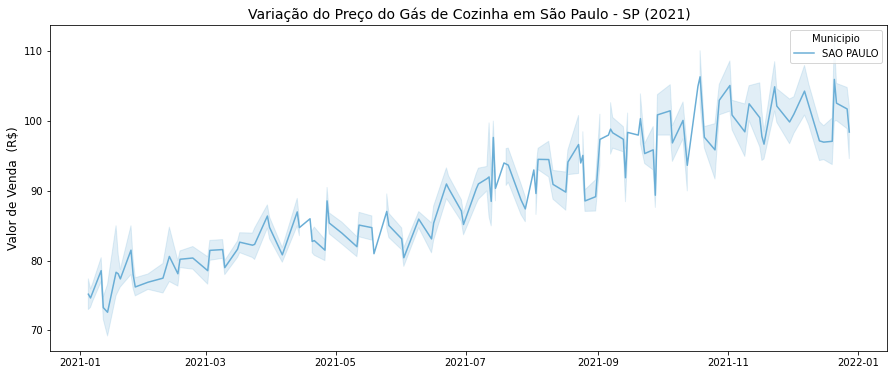

In [119]:
# Criação de um gráfico de linhas com a Variação do Preço do Gás de Cozinha em São Paulo (SP) em 2021
# Line graph of price variation of the Cooking Gas in Sao Paulo (SP) in 2021
plt.figure(figsize=(15,6))
sns.lineplot(data=SaoPauloGLP2021,x='Data da Coleta', 
             y='Valor de Venda', hue='Municipio', palette='Blues')
plt.title('Variação do Preço do Gás de Cozinha em São Paulo - SP (2021)', fontsize=14)
plt.ylabel('Valor de Venda  (R$)', fontsize=12)
plt.xlabel('', fontsize=12)
plt.show()

In [120]:
# Criação de um Dataframe com a variação do preço do Gás de Cozinha em 2021 nos municípios de São Paulo (SP), Rio de Janeiro (RJ)
# e Brasília (DF)

# Creation of a DataFrame with price varation of the Cooking Gas in 2021 in the cities of São Paulo (SP), Rio de Janeiro (RJ)
# and Brasília (DF)

df1 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'SAO PAULO') &
                   (dados2015_2022['Data da Coleta'] >= '2021-01-01') & 
                   (dados2015_2022['Data da Coleta'] <= '2021-12-31')]

df2 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'RIO DE JANEIRO') &
                   (dados2015_2022['Data da Coleta'] >= '2021-01-01') & 
                   (dados2015_2022['Data da Coleta'] <= '2021-12-31')]

df3 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'BRASILIA') &
                   (dados2015_2022['Data da Coleta'] >= '2021-01-01') & 
                   (dados2015_2022['Data da Coleta'] <= '2021-12-31')]

dfs = [df1, df2, df3]

list_ = df1.columns.tolist()

GLP2021_SaoPaulo_RiodeJaneiro_Brasilia = reduce(lambda  left,right: pd.merge(left,right,on=list_,
                                            how='outer'), dfs)

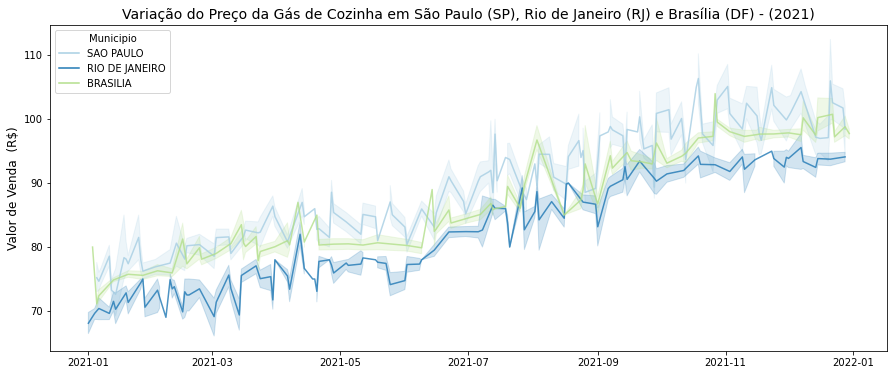

In [121]:
# Criação de um gráfico de linhas com a Variação do Preço do Gás de Cozinha em São Paulo (SP), Rio de Janeiro (RJ)
# e Brasília (DF) em 2021

# Line graph of price variation of the Cooking Gas in Sao Paulo (SP), Rio de Janeiro (RJ) and Brasília (DF) in 2021

plt.figure(figsize=(15,6))
palette=sns.color_palette("Set2")
sns.lineplot(data=GLP2021_SaoPaulo_RiodeJaneiro_Brasilia, x='Data da Coleta', 
             y='Valor de Venda', hue='Municipio', palette='Paired', alpha=0.8)
plt.title('Variação do Preço da Gás de Cozinha em São Paulo (SP), Rio de Janeiro (RJ) e Brasília (DF) - (2021)', fontsize=14)
plt.ylabel('Valor de Venda  (R$)', fontsize=12)
plt.xlabel('', fontsize=12)
plt.show()

In [122]:
# Criação de um Dataframe com a variação do preço do Gás de Cozinha até junho de 2022 nos municípios de São Paulo (SP), 
# Rio de Janeiro (RJ) e Brasília (DF)

# Creation of a DataFrame with price varation of the Cooking Gas in 2022 in the cities of São Paulo (SP), Rio de Janeiro (RJ)
# and Brasília (DF)

df1 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'SAO PAULO') &
                   (dados2015_2022['Data da Coleta'] >= '2022-01-01')]                    

df2 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'RIO DE JANEIRO') &
                   (dados2015_2022['Data da Coleta'] >= '2022-01-01')]                   

df3 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'BRASILIA') &
                   (dados2015_2022['Data da Coleta'] >= '2022-01-01')] 
                   

dfs = [df1, df2, df3]

list_ = df1.columns.tolist()

GLP2022_SaoPaulo_RiodeJaneiro_Brasilia = reduce(lambda  left,right: pd.merge(left,right,on=list_,
                                            how='outer'), dfs)

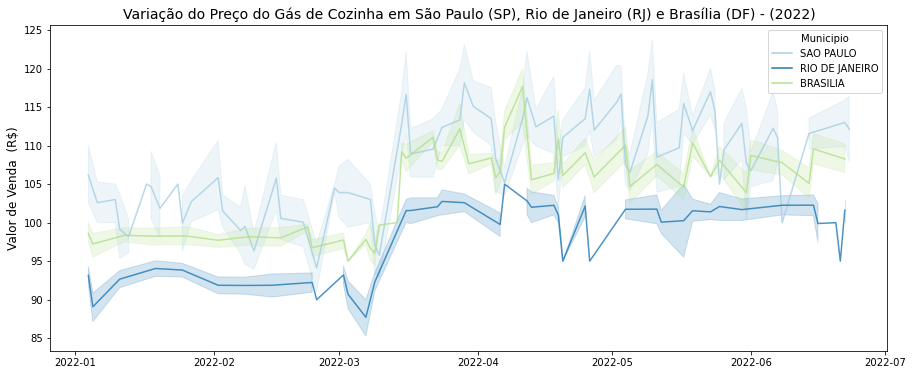

In [123]:
# Criação de um gráfico de linhas com a Variação do Preço do Gás de Cozinha em São Paulo (SP), Rio de Janeiro (RJ)
# e Brasília (DF) até junho de 2022

# Line graph of price variation of the Cooking Gas in Sao Paulo (SP), Rio de Janeiro (RJ) and Brasília (DF) in 2022

plt.figure(figsize=(15,6))
palette=sns.color_palette("Set2")
sns.lineplot(data=GLP2022_SaoPaulo_RiodeJaneiro_Brasilia, x='Data da Coleta', 
             y='Valor de Venda', hue='Municipio', palette='Paired', alpha=0.8)
plt.title('Variação do Preço do Gás de Cozinha em São Paulo (SP), Rio de Janeiro (RJ) e Brasília (DF) - (2022)', 
          fontsize=14)
plt.ylabel('Valor de Venda  (R$)', fontsize=12)
plt.xlabel('', fontsize=12)
plt.show()

In [124]:
# Criação de um Dataframe com a variação do preço do Gás de Cozinha em 2021 nos municípios de Curitiba (PR), Florianópolis (SC)
# e Porto Alegre (RS)

# Creation of a DataFrame with price varation of the Cooking Gas in 2021 in the cities of Curitiba (PR), Florianópolis (SC)
# and Porto Alegre (RS) 

df1 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'CURITIBA') &
                   (dados2015_2022['Data da Coleta'] >= '2021-01-01') & 
                   (dados2015_2022['Data da Coleta'] <= '2021-12-31')]

df2 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'FLORIANOPOLIS') &
                   (dados2015_2022['Data da Coleta'] >= '2021-01-01') & 
                   (dados2015_2022['Data da Coleta'] <= '2021-12-31')]

df3 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'PORTO ALEGRE') &
                   (dados2015_2022['Data da Coleta'] >= '2021-01-01') & 
                   (dados2015_2022['Data da Coleta'] <= '2021-12-31')]

dfs = [df1, df2, df3]

list_ = df1.columns.tolist()

GLP2021_Curitiba_Florianopolis_PortoAlegre = reduce(lambda  left,right: pd.merge(left,right,on=list_,
                                            how='outer'), dfs)

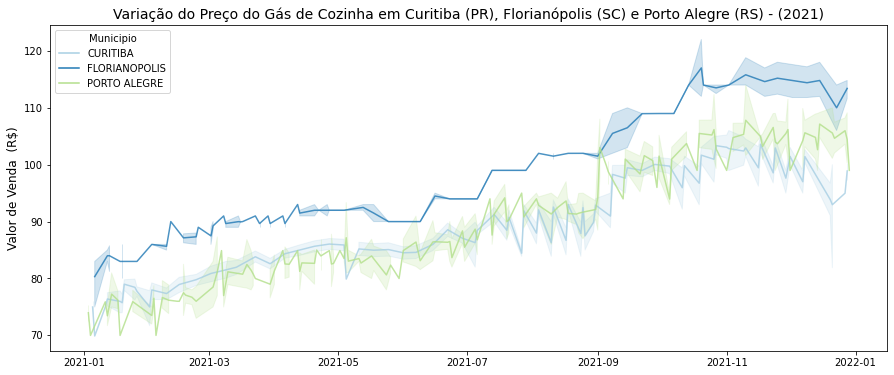

In [125]:
# Criação de um gráfico de linhas com a Variação do Preço do Gás de Cozinha em Curitiba (PR), Florianópolis (SC)
# e Porto Alegre (RS) em 2021

# Line graph of price variation of the Cooking Gas in Curitiba (PR), Florianópolis (SC) and Brasília (DF) in 2021

plt.figure(figsize=(15,6))
palette=sns.color_palette("Set2")
sns.lineplot(data=GLP2021_Curitiba_Florianopolis_PortoAlegre, x='Data da Coleta', 
             y='Valor de Venda', hue='Municipio', palette='Paired', alpha=0.8)
plt.title('Variação do Preço do Gás de Cozinha em Curitiba (PR), Florianópolis (SC) e Porto Alegre (RS) - (2021)', 
          fontsize=14)
plt.ylabel('Valor de Venda  (R$)', fontsize=12)
plt.xlabel('', fontsize=12)
plt.show()

In [128]:
# Criação de um Dataframe com a variação do preço do Gás de Cozinha em 2021 nos municípios de Curitiba (PR), Florianópolis (SC)
# e Porto Alegre (RS)

# Creation of a DataFrame with price varation of the Cooking Gas in 2021 in the cities of Curitiba (PR), Florianópolis (SC)
# and Porto Alegre (RS) 

df1 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'CURITIBA') &
                   (dados2015_2022['Data da Coleta'] >= '2022-01-01')] 

df2 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'FLORIANOPOLIS') &
                   (dados2015_2022['Data da Coleta'] >= '2022-01-01')] 

df3 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'PORTO ALEGRE') &
                   (dados2015_2022['Data da Coleta'] >= '2022-01-01')]

dfs = [df1, df2, df3]

list_ = df1.columns.tolist()

GLP2022_Curitiba_Florianopolis_PortoAlegre = reduce(lambda  left,right: pd.merge(left,right,on=list_,
                                            how='outer'), dfs)

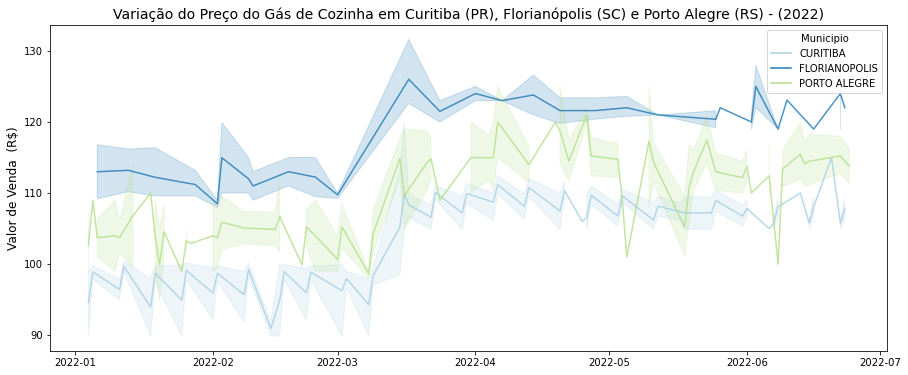

In [129]:
# Criação de um gráfico de linhas com a Variação do Preço do Gás de Cozinha em Curitiba (PR), Florianópolis (SC)
# e Porto Alegre (RS) em 2021

# Line graph of price variation of the Cooking Gas in Curitiba (PR), Florianópolis (SC) and Brasília (DF) in 2021

plt.figure(figsize=(15,6))
palette=sns.color_palette("Set2")
sns.lineplot(data=GLP2022_Curitiba_Florianopolis_PortoAlegre, x='Data da Coleta', 
             y='Valor de Venda', hue='Municipio', palette='Paired', alpha=0.8)
plt.title('Variação do Preço do Gás de Cozinha em Curitiba (PR), Florianópolis (SC) e Porto Alegre (RS) - (2022)', 
          fontsize=14)
plt.ylabel('Valor de Venda  (R$)', fontsize=12)
plt.xlabel('', fontsize=12)
plt.show()